In [5]:

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "~/Desktop/city_data.csv"
ride_data_to_load = "~/Desktop/ride_data.csv"

# Read the City and Ride Data

ride_data_to_load_df = pd.read_csv(ride_data_to_load)
city_data_to_load_df = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset using left merge on city
combined_ride_df = pd.merge(ride_data_to_load_df,city_data_to_load_df, how='left', on='city')
# Display the data table for preview
combined_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Obtain the x and y coordinates for each of the three city types
# Filter the data so that only those rides that are Urban are in a DataFrame
urban = combined_ride_df.loc[combined_ride_df["type"]=="Urban", :]
# Filter the data so that only those rides that are Suburban are in a DataFrame
suburban = combined_ride_df.loc[combined_ride_df["type"]=="Suburban", :]
# Filter the data so that only those rides that are Rural are in a DataFrame
rural = combined_ride_df.loc[combined_ride_df["type"]=="Rural", :]

In [7]:
# Count number of urban rides within each city by ride id (grouped by urban)
urban_rides = urban.groupby(["city"]).count()["ride_id"]
# Average the number of urban fares within each city by fares (grouped by urban)
urban_avg_fares = urban.groupby(["city"]).mean()["fare"]
# count the number of urban drivers by driver count (grouped by urban)
urban_driver_count = urban.groupby("driver_count").count()

In [8]:
# Count number of suburban rides within each city by ride id (grouped by suburban)
suburban_rides = suburban.groupby(["city"]).count()["ride_id"]
# Average the number of suburban fares within each city by fares (grouped by suburban)
suburban_avg_fares = suburban.groupby(["city"]).mean()["fare"]
# count the number of suburban drivers by driver count (grouped by urban)
suburban_driver_count = suburban.groupby("driver_count").count()

In [9]:
# Count number of rural rides within each city by ride id (grouped by rural)
rural_rides = rural.groupby(["city"]).count()["ride_id"]
# Average the number of rural fares within each city by fares (grouped by rural)
rural_avg_fares = rural.groupby(["city"]).mean()["fare"]
# count the number of rural drivers by driver count (grouped by rural)
rural_driver_count = rural.groupby("driver_count").count()

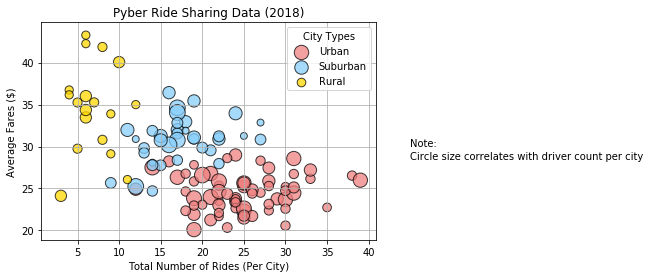

In [10]:

# Build the scatter plots for each city types
# double the width (or height) of the marker you need to increase s by a factor of 4.
urbanplot = plt.scatter(urban_rides, urban_avg_fares, marker="o", facecolors="LightCoral", edgecolors="black",
            s=urban_driver_count*4, alpha=.75, label="Urban")

suburbanplot = plt.scatter(suburban_rides, suburban_avg_fares, marker="o", facecolors="LightSkyBlue", edgecolors="black",
            s=suburban_driver_count*4, alpha=.75, label="Suburban")

ruralplot = plt.scatter(rural_rides, rural_avg_fares, marker="o", facecolors="gold", edgecolors="black",
            s=rural_driver_count*4, alpha=.75, label="Rural")


# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

# Create a legend
plt.legend(handles=[urbanplot, suburbanplot, ruralplot], loc="best",title = 'City Types')

# Save Figure
plt.savefig("scatter.png")

# Add in a grid for the chart
plt.grid()

# Add text label
plt.text(45, 30, 'Note:')
plt.text(45, 28.5, 'Circle size correlates with driver count per city')

# Show plot
plt.show()

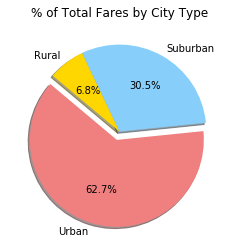

In [11]:

# Calculate Type Percents
# create data set by fare sum across urban, suburban and rural 
urban_fares = urban["fare"].sum()
suburban_fares = suburban["fare"].sum()
rural_fares = rural["fare"].sum()

# Build Pie Chart
fares =[urban_fares,suburban_fares,rural_fares]
labels =["Urban","Suburban","Rural"]
colors = ["LightCoral","LightSkyBlue","gold"]
explode = [0.1,0,0]
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# add title
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Pie.png")

#Show Figure
plt.show()

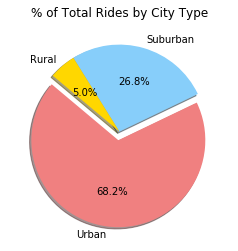

In [12]:

# Calculate Ride Percents
# create data set by ride id sum across urban, suburban and rural 
urban_rides = urban["ride_id"].sum()
suburban_rides = suburban["ride_id"].sum()
rural_rides = rural["ride_id"].sum()
rides =[urban_rides,suburban_rides,rural_rides]

# Build Pie Chart
rides =[urban_rides,suburban_rides,rural_rides]
labels =["Urban","Suburban","Rural"]
colors = ["LightCoral","LightSkyBlue","gold"]
explode = [0.1,0,0]
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# add title
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pie2.png")

#Show Figure
plt.show()

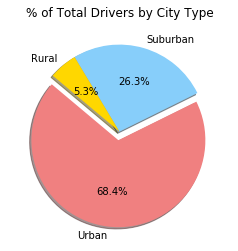

In [13]:

# Calculate Driver Percents
# create data set by driver count across urban, suburban and rural 
urban_drivers = urban["driver_count"].count()
suburban_drivers = suburban["driver_count"].count()
rural_drivers = rural["driver_count"].count()

# Build Pie Chart
drivers =[urban_drivers,suburban_drivers,rural_drivers]
labels =["Urban","Suburban","Rural"]
colors = ["LightCoral","LightSkyBlue","gold"]
explode = [0.1,0,0]
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# add title
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pie3.png")

#Show Figure
plt.show()